##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 2 Report

### Group Members: Akash Shetty, Helen Lai

In [1]:
import numpy as np


# Exercise 1: Loops vs Numpy operations

<img src="lab2_exercise1.png" width="1000">

In [2]:
import time # Import time to measure computational efficiency of the code

In [3]:
arr2d_1 = np.random.randn(1000, 1000) * 10
arr2d_2 = np.random.randn(1000, 1000) * 10

In [4]:
# Elementwise addition using loop

arr2d_3_loop = np.zeros((1000, 1000)) # Create a placeholder array for arr2d_3

start_time_loop = time.time() # start time of the code
for i in range(0,1000):
    for j in range(0,1000) :
        arr2d_3_loop[i][j] = (arr2d_1[i][j]+arr2d_2[i][j])
# YOUR CODE HERE FOR ELEMENTWISE ADDITION USING TWO NESTED LOOPS

end_time_loop = time.time() # end time of the code

elapsed_time_loop = end_time_loop - start_time_loop # end time - start time -> elapsed time in seconds
print(elapsed_time_loop)

0.8747608661651611


In [5]:
# Elementwise addition using Numpy function

start_time_np = time.time()

arr2d_3_np = np.add(arr2d_1, arr2d_2)

end_time_np = time.time()

elapsed_time_np = end_time_np - start_time_np
print(elapsed_time_np)

0.0


In [6]:
# Make sure two outputs are equivalent

np.sum(arr2d_3_loop == arr2d_3_np) == 1000 * 1000 # Should output True if the outputs are same

True

### Which computation is faster and by what factor?
### e.g. a code that takes 0.1s is faster by a factor of 10 compared to a code that takes 1s

In [7]:
#The numpy computation is faster by a facor of 302

# Exercise 2: Generate Triangular Waveform

<img src="lab2_exercise2.png" width="1000">

<StemContainer object of 3 artists>

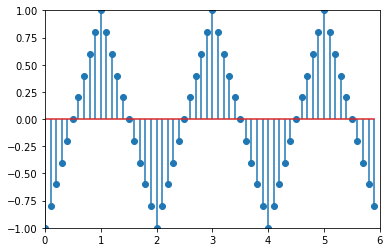

In [8]:
# Your code here

import matplotlib.pyplot as plt

# sets the values of the waveform for the time range
x = np.arange(0,6,1/10)
y1 = x[0:11]*2-1
y2 = x[11:21]*-2+3
y3 = x[21:31]*2-5
y4 = x[31:41]*-2+7
y5 = x[41:51]*2-9
y6 = x[51:61]*-2+11

# concatenates values to get waveform
y = np.concatenate((y1,y2,y3,y4,y5,y6))

# plots values on graph between 0-6 seconds and a y limit of -1,1 with a stem style plot
plt.xlim(0,6)
plt.ylim(-1,1)
plt.stem(x,y)
        

        
    

# Exercise 3: Sinusoidal Generator

<img src="lab2_exercise3.png" width="1000">

In [9]:
# Define generate_sine function

def generate_sine(t_duration, f0, fs):
    # aranges t between t and given duration with a spacing of 1/sampling frequency
    t_arr = np.arange(0,t_duration,1/fs)
    amplitudes = np.sin(2*np.pi*f0*t_arr)
    
    
    # Return 1D numpy arrays each containing timepoints and sine waveform amplitudes
    return t_arr, amplitudes 

In [10]:
# parameter set 1
t_duration_1 = 5
f0_1 = 0.5
fs_1 = 100
t_arr_1, amplitudes_1 = generate_sine(t_duration_1, f0_1, fs_1)
# parameter set 2
t_duration_2 = 5
f0_2 = 1.
fs_2 = 100
t_arr_2, amplitudes_2 = generate_sine(t_duration_2, f0_2, fs_2)

# parameter set 3
t_duration_3 = 5
f0_3 = 1.5
fs_3 = 100
t_arr_3, amplitudes_3 = generate_sine(t_duration_3, f0_3, fs_3)

Text(0, 0.5, 'y')

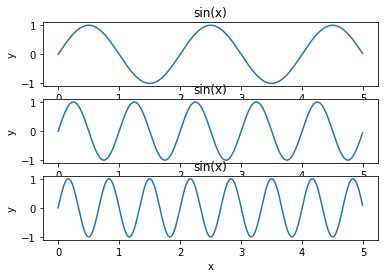

In [17]:
# Plot 3 x 1 subplot showing all three waveform
# first subplot of waveform
plt.subplot (311)
plt.plot(t_arr_1, amplitudes_1)
plt.title("sin(x)")
plt.xlabel('x')
plt.ylabel('y')
# second subplot of waveform
plt.subplot (312)
plt.plot(t_arr_2, amplitudes_2)
plt.title("sin(x)")
plt.xlabel('x')
plt.ylabel('y')
# second subplot of waveform
plt.subplot (313)
plt.plot(t_arr_3, amplitudes_3)
plt.title("sin(x)")
plt.xlabel('x')
plt.ylabel('y')



# Exercise 4: Notes Synthesis

<img src="lab2_exercise4.png" width="1000">

In [21]:

from scipy.io import wavfile as wav
import simpleaudio as sa
#Uses our generate sin function to create waveforms of the notes that are given
_,A_1 =  generate_sine(1, 220, 8000)
_,B =  generate_sine(1, 220*(2**(2/12)), 8000)
_,Csharp =  generate_sine(1, 220*(2**(4/12)), 8000)
_,D =  generate_sine(1, 220*(2**(5/12)), 8000)
_,E =  generate_sine(1, 220*(2**(7/12)), 8000)
_,Fsharp =  generate_sine(1, 220*(2**(9/12)), 8000)
_,Gsharp =  generate_sine(1, 220*(2**(11/12)), 8000)
_,A_2 =  generate_sine(1, 440, 8000)

# concatenates the notes into a 1D array
A_major_scale = np.concatenate((A_1,B,Csharp,D,E,Fsharp,Gsharp,A_2))


In [22]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
A_major_file_scale = A_major_scale * 32767
outfile = "a_major_scale.wav"
wav.write(outfile,8000,A_major_file_scale.astype("int16"))

# before playing or writing your audio array into a file. 
wav_obj = sa.WaveObject.from_wave_file("a_major_scale.wav")
play_obj = wav_obj.play()
play_obj.wait_done()

# Exercise 5: Chord Synthesis

<img src="lab2_exercise5.png" width="1000">

In [18]:

# adds our notes together to create chord with /2 to account for amplitude changes
Chord_1 = np.add(A_1,Csharp)/2
Chord_2 = np.add(B,D)/2
Chord_3 = np.add(Csharp,E)/2
Chord_4 = np.add(D,Fsharp)/2
Chord_5 = np.add(E,Gsharp)/2
Chord_6 = np.add(Fsharp,A_2)/2


# concatenates our chords into a 1D array
Chord_scale = np.concatenate((Chord_1,Chord_2,Chord_3,Chord_4,Chord_5,Chord_6))

In [20]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 
Chord_file_scale = Chord_scale * 32767
outfile = "6_chords.wav"
wav.write(outfile,8000,Chord_file_scale.astype("int16"))

# before playing or writing your audio array into a file. 
wav_obj = sa.WaveObject.from_wave_file("6_chords.wav")
play_obj = wav_obj.play()
play_obj.wait_done()